In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smoking.csv')

In [3]:
column_rename_map = {
    'height(cm)': 'height',
    'weight(kg)': 'weight',
    'waist(cm)': 'waist',
    'eyesight(left)': 'eyesight_left',
    'eyesight(right)': 'eyesight_right',
    'hearing(left)': 'hearing_left',
    'hearing(right)': 'hearing_right',
    'fasting blood sugar': 'fasting_blood_sugar',
    'Cholesterol': 'cholesterol',
    'HDL': 'hdl',
    'LDL': 'ldl',
    'Urine protein': 'urine_protein',
    'serum creatinine': 'serum_creatinine',
    'AST': 'ast',
    'ALT': 'alt',
    'Gtp': 'gtp',
    'dental caries': 'dental_caries'
}

In [4]:
df.rename(columns=column_rename_map, inplace=True)

<AxesSubplot:>

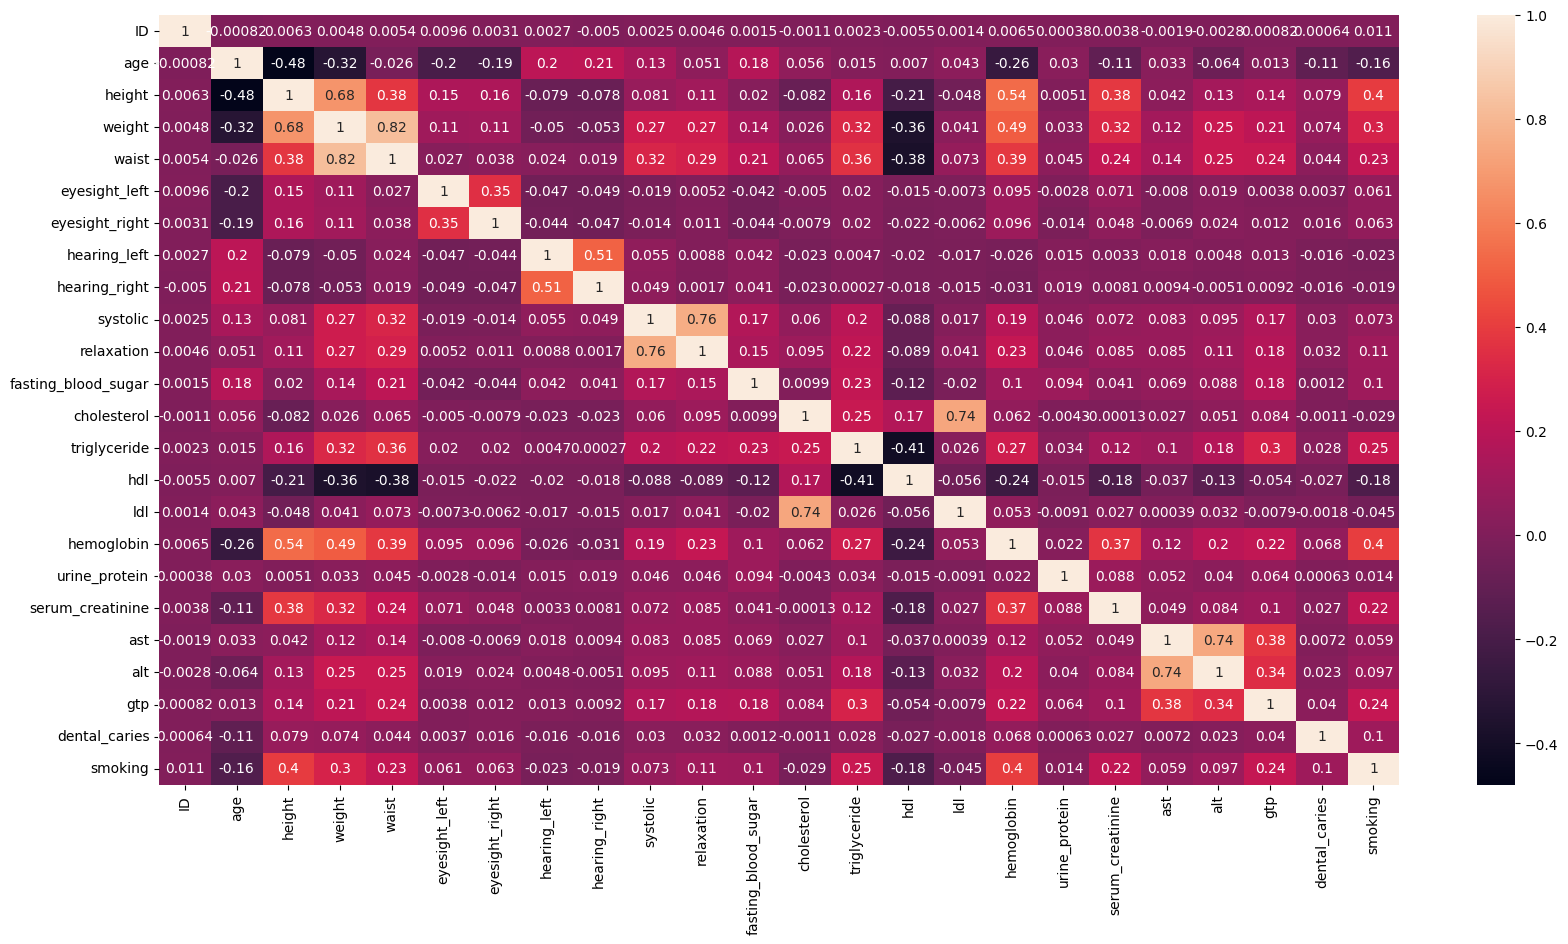

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [6]:
df.fillna(df.mean(), inplace=True)

c:\Users\khair\LibraryCompbio\environments\computational_biology\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [8]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [9]:
df.columns

Index(['ID', 'gender', 'age', 'height', 'weight', 'waist', 'eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'oral', 'dental_caries', 'tartar', 'smoking'],
      dtype='object')

In [10]:
target_column_name = 'smoking' 

In [11]:
scaler = StandardScaler()
features = df.drop(target_column_name, axis=1)
target = df[target_column_name]
features_scaled = scaler.fit_transform(features)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [13]:
svm_model = svm.SVC(kernel='linear')
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)


In [14]:
log_reg_model = LogisticRegression()
log_reg_cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5)

In [15]:
svm_model.fit(X_train, y_train)
svm_test_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

log_reg_model.fit(X_train, y_train)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_model.predict(X_test))

print("SVM Test Accuracy:", svm_test_accuracy)
print("Logistic Regression Test Accuracy:", log_reg_test_accuracy)

SVM Test Accuracy: 0.7393841457940569
Logistic Regression Test Accuracy: 0.7409103151090762


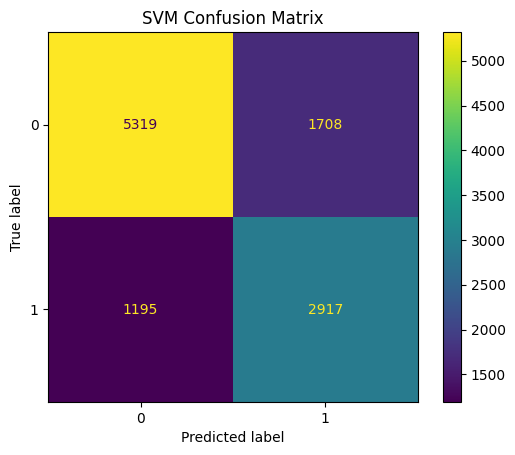

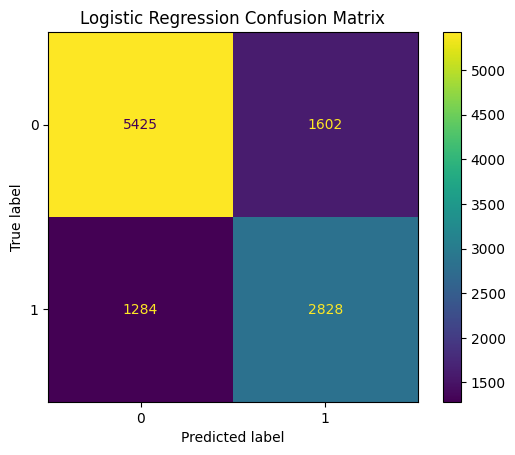

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_model.predict(X_test))
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
svm_disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

# Confusion Matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_model.predict(X_test))
log_reg_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm)
log_reg_disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


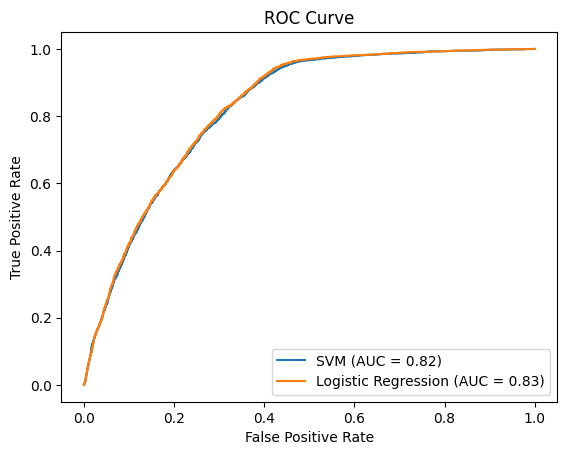

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve for SVM
svm_probs = svm_model.decision_function(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')

# ROC Curve for Logistic Regression
log_reg_probs = log_reg_model.predict_proba(X_test)[:, 1]
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
log_reg_auc = roc_auc_score(y_test, log_reg_probs)

plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Conclusion

Both the Support Vector Machine (SVM) and Logistic Regression models were evaluated on the test dataset. The SVM model achieved an accuracy of approximately 73.94%, while the Logistic Regression model achieved a slightly higher accuracy of approximately 74.09%. These results indicate that both models perform similarly in predicting the health outcomes related to smoking, with Logistic Regression having a marginal edge in accuracy. From the data analysis and machine learning modeling that we have carried out, vital signs from the human body have been proven to be able to prove whether a person is in the category of smoker or not.